**This notebook is an exercise in the [Intermediate Machine Learning](https://www.kaggle.com/learn/intermediate-machine-learning) course.  You can reference the tutorial at [this link](https://www.kaggle.com/alexisbcook/cross-validation).**

---


In this exercise, you will leverage what you've learned to tune a machine learning model with **cross-validation**.

# Setup

The questions below will give you feedback on your work. Run the following cell to set up the feedback system.

In [1]:
# Set up code checking
import os
if not os.path.exists("../input/train.csv"):
    os.symlink("../input/home-data-for-ml-course/train.csv", "../input/train.csv")  
    os.symlink("../input/home-data-for-ml-course/test.csv", "../input/test.csv") 
from learntools.core import binder
binder.bind(globals())
from learntools.ml_intermediate.ex5 import *
print("Setup Complete")

Setup Complete


You will work with the [Housing Prices Competition for Kaggle Learn Users](https://www.kaggle.com/c/home-data-for-ml-course) from the previous exercise. 

![Ames Housing dataset image](https://i.imgur.com/lTJVG4e.png)

Run the next code cell without changes to load the training and validation sets in `X_train`, `X_valid`, `y_train`, and `y_valid`.  The test set is loaded in `X_test`.

For simplicity, we drop categorical variables.

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the data
train_data = pd.read_csv('../input/train.csv', index_col='Id')
test_data = pd.read_csv('../input/test.csv', index_col='Id')

# Remove rows with missing target, separate target from predictors
train_data.dropna(axis=0, subset=['SalePrice'], inplace=True)
y = train_data.SalePrice              
train_data.drop(['SalePrice'], axis=1, inplace=True)

# Select numeric columns only
numeric_cols = [cname for cname in train_data.columns if train_data[cname].dtype in ['int64', 'float64']]
X = train_data[numeric_cols].copy()
X_test = test_data[numeric_cols].copy()

Use the next code cell to print the first several rows of the data.

In [3]:
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
Id,,,,,,,,,,,,,,,,,,,,,
1,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,548,0,61,0,0,0,0,0,2,2008
2,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,460,298,0,0,0,0,0,0,5,2007
3,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,608,0,42,0,0,0,0,0,9,2008
4,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,642,0,35,272,0,0,0,0,2,2006
5,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,836,192,84,0,0,0,0,0,12,2008


So far, you've learned how to build pipelines with scikit-learn.  For instance, the pipeline below will use [`SimpleImputer()`](https://scikit-learn.org/stable/modules/generated/sklearn.impute.SimpleImputer.html) to replace missing values in the data, before using [`RandomForestRegressor()`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html) to train a random forest model to make predictions.  We set the number of trees in the random forest model with the `n_estimators` parameter, and setting `random_state` ensures reproducibility.

In [4]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=50, random_state=0))
])

You have also learned how to use pipelines in cross-validation.  The code below uses the [`cross_val_score()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html) function to obtain the mean absolute error (MAE), averaged across five different folds.  Recall we set the number of folds with the `cv` parameter.

In [5]:
from sklearn.model_selection import cross_val_score

# Multiply by -1 since sklearn calculates *negative* MAE
scores = -1 * cross_val_score(my_pipeline, X, y,
                              cv=5,
                              scoring='neg_mean_absolute_error')

print("Average MAE score:", scores.mean())

Average MAE score: 18276.410356164386


# Step 1: Write a useful function

In this exercise, you'll use cross-validation to select parameters for a machine learning model.

Begin by writing a function `get_score()` that reports the average (over three cross-validation folds) MAE of a machine learning pipeline that uses:
- the data in `X` and `y` to create folds,
- `SimpleImputer()` (with all parameters left as default) to replace missing values, and
- `RandomForestRegressor()` (with `random_state=0`) to fit a random forest model.

The `n_estimators` parameter supplied to `get_score()` is used when setting the number of trees in the random forest model.  

In [6]:
def get_score(n_estimators):
    """Return the average MAE over 3 CV folds of random forest model.
    
    Keyword argument:
    n_estimators -- the number of trees in the forest
    """
    # Replace this body with your own code
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

# Check your answer
step_1.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [7]:
# Lines below will give you a hint or solution code
step_1.hint()
step_1.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Begin by making a pipeline with the `Pipeline` class. Be sure to set the value for `n_estimators` in `RandomForestRegressor()` to the argument supplied to the `get_score` function. Then, use `cross_val_score()` to get the MAE for each fold, and take the average. Be sure to set the number of folds to three through the `cv`parameter.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
def get_score(n_estimators):
    my_pipeline = Pipeline(steps=[
        ('preprocessor', SimpleImputer()),
        ('model', RandomForestRegressor(n_estimators, random_state=0))
    ])
    scores = -1 * cross_val_score(my_pipeline, X, y,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')
    return scores.mean()

```

# Step 2: Test different parameter values

Now, you will use the function that you defined in Step 1 to evaluate the model performance corresponding to eight different values for the number of trees in the random forest: 50, 100, 150, ..., 300, 350, 400.

Store your results in a Python dictionary `results`, where `results[i]` is the average MAE returned by `get_score(i)`.

In [8]:
from tqdm import tqdm
temp = list(range(50,401,50))
results=[]

for i in tqdm(range(len(temp))):
    results.append(get_score(temp[i]))

100%|██████████| 8/8 [01:03<00:00,  7.98s/it]


In [9]:
results = {}
for i in tqdm(range(1,9)):
    results[50*i] = get_score(50*i)
    
# Check your answer
step_2.check()

100%|██████████| 8/8 [01:03<00:00,  7.94s/it]


<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [10]:
# Lines below will give you a hint or solution code
step_2.hint()
step_2.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Begin by instantiating the dictionary with `results = {}`. Then loop over the value for `n_estimators` that will be plugged into the `get_score()` function, and use the result to set the value in the dictionary.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
results = {}
for i in range(1,9):
    results[50*i] = get_score(50*i)

```

Use the next cell to visualize your results from Step 2.  Run the code without changes.

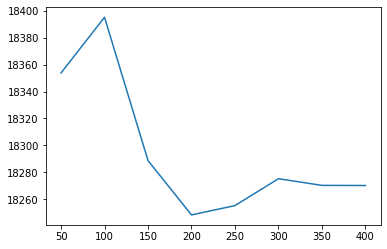

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

# Step 3: Find the best parameter value

Given the results, which value for `n_estimators` seems best for the random forest model?  Use your answer to set the value of `n_estimators_best`.

In [12]:
n_estimators_best = min(results, key=results.get)

# Check your answer
step_3.check()

<IPython.core.display.Javascript object>

<span style="color:#33cc33">Correct</span>

In [13]:
# Lines below will give you a hint or solution code
step_3.hint()
step_3.solution()

<IPython.core.display.Javascript object>

<span style="color:#3366cc">Hint:</span> Find the key corresponding to the minimum value in the `results` dictionary from the previous step.  This will tell you which value for `n_estimators` gets the lowest average MAE.

<IPython.core.display.Javascript object>

<span style="color:#33cc99">Solution:</span> 
```python
n_estimators_best = min(results, key=results.get)
```

In this exercise, you have explored one method for choosing appropriate parameters in a machine learning model.  

If you'd like to learn more about [hyperparameter optimization](https://en.wikipedia.org/wiki/Hyperparameter_optimization), you're encouraged to start with **grid search**, which is a straightforward method for determining the best _combination_ of parameters for a machine learning model.  Thankfully, scikit-learn also contains a built-in function [`GridSearchCV()`](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) that can make your grid search code very efficient!

# Keep going

Continue to learn about **[gradient boosting](https://www.kaggle.com/alexisbcook/xgboost)**, a powerful technique that achieves state-of-the-art results on a variety of datasets.

---




*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum/161289) to chat with other Learners.*